In [2]:
#Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# to make this notebook's output stable across runs
np.random.seed(123)

# To plot figures
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Data Exploration: 

## <font color='red'> to be updated:

<font color='red'>The borehole logs and laboratory testing from 44 sites were analysed and interpreted values for the following geotechnical parameters were obtained:

* Natural moisture content (wn),
* Initial Void Ratio (e0),
* Atterberg Limits determinations,
    * Liquid Limit (wL)
    * Plastic Limit (wP)
    * Plasticity Index (Ip)
* Overconsolidated Ratio (OCR),
* Preconsolidation Constrained Modulus (Mi),
* Post-consolidation Constrained Modulus (MP),
* Compression Index (Cc), and
* Recompression Index (Cr).

Over 111 oedometer tests and 94 Atterberg Limits determination tests results were collected for analyses.</font>

#### 1.1 Loading Data

In [105]:
## Reading data
pd.options.display.max_columns = None
Geo_DB_original = pd.read_excel("GEO_DB_PS-20200113.xlsx",sheet_name="Cons for ANN",skiprows=1)
#Geo_DB_original.head()

In [106]:
Geo_DB_original.shape

(91, 29)

#### 1.2 Cleaning Data

In [107]:
#Changing columns names for inputs and outputs
Geo_DB_rename = Geo_DB_original.rename(columns={'Top Depth (m)':'Top_Depth','Easting (m)':'Easting','Northing (m)':'Northing',
                                       'Soil Class':'Class','e0':'e0','gd0 (kN/m3)':'gd0','Gs':'Gs',
                                       'w0 (%)':'w0','Organic Content (%)':'OC','CV \n(m2/year)':'CV'})

In [108]:
# Assigning features and targets (inputs, outputs)
features=['Top_Depth','Easting','Northing','Class','e0','gd0','Gs','w0','OC']
targets=['Cce','Cre','Cae','OCR','CV']

In [109]:
Geo_DB=Geo_DB_rename[features+targets]

In [110]:
Geo_DB.shape

(91, 14)

In [111]:
#Clean Data

# Remove rows where the soil class is 'other' ( three rows)
Geo_DB=Geo_DB[Geo_DB['Class']!='other'] 

# Remove the word "Class"
Geo_DB.loc[:]['Class']=Geo_DB['Class'].str.lstrip('Class ')

# Remove rows with Gs= 8.41 and Gs=0.27 which looks like an outlier (two rows)
Geo_DB=Geo_DB[Geo_DB['Gs']<8]
Geo_DB=Geo_DB[Geo_DB['Gs']>0.5]

# Remove the row with OCR= 38.37 (one row)
Geo_DB=Geo_DB[Geo_DB['OCR']<38]

# Remove rows with Organic Content not available (four rows)
Geo_DB.dropna(inplace=True)

In [136]:
#Change the Class type from Object to integer
Geo_DB['Class']=Geo_DB['Class'].astype(int)

In [137]:
Geo_DB.Class.dtype

dtype('int32')

In [138]:
Geo_DB.shape

(81, 14)

In [139]:
Geo_DB.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81 entries, 0 to 88
Data columns (total 14 columns):
Top_Depth    81 non-null float64
Easting      81 non-null float64
Northing     81 non-null float64
Class        81 non-null int32
e0           81 non-null float64
gd0          81 non-null float64
Gs           81 non-null float64
w0           81 non-null float64
OC           81 non-null float64
Cce          81 non-null float64
Cre          81 non-null float64
Cae          81 non-null float64
OCR          81 non-null float64
CV           81 non-null float64
dtypes: float64(13), int32(1)
memory usage: 11.7 KB


In [140]:
Geo_DB.describe()

,Top_Depth,Easting,Northing,Class,e0,gd0,Gs,w0,OC,Cce,Cre,Cae,OCR,CV
count,81.000000,81.000000,8.100000e+01,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000
mean,6.160617,317010.632753,4.833907e+06,4.358025,3.263332,8.149259,2.463945,1.213871,24.488889,0.220171,0.042087,0.014877,2.579976,9.696221
std,3.108251,307.291113,2.601418e+02,0.598094,2.828720,4.414781,0.301613,1.008709,15.512471,0.118825,0.034353,0.011721,3.534404,6.454127
min,3.000000,316262.413000,4.833436e+06,3.000000,0.646064,1.680000,1.300053,0.194988,6.300000,0.037607,0.001453,0.000041,0.000000,0.000000
25%,4.000000,316852.080000,4.833709e+06,4.000000,1.160449,4.420000,2.396858,0.420700,13.800000,0.134448,0.012085,0.004715,1.000000,4.472518
50%,5.200000,317059.720000,4.833910e+06,4.000000,2.293667,7.710000,2.556767,0.789813,19.000000,0.224097,0.034747,0.012484,1.050000,8.469383
75%,6.900000,317231.388000,4.834093e+06,5.000000,4.229384,12.370000,2.647911,1.612000,28.300000,0.285906,0.063025,0.024085,2.150000,14.241609
max,20.400000,317478.900000,4.834532e+06,5.000000,14.480575,16.550000,3.049280,4.172039,74.300000,0.858000,0.132033,0.049446,18.812399,28.601241


#### 1.3 Ploting Data

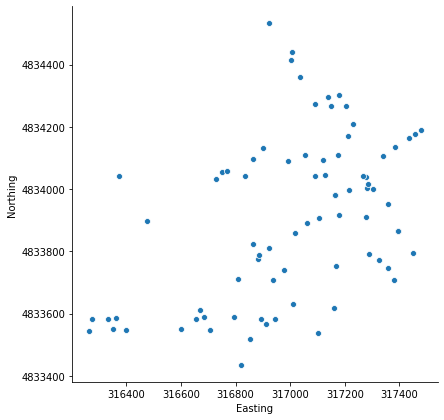

In [141]:
#Plot samples locations using easting and northing
p=sns.pairplot(Geo_DB,height=6, x_vars=['Easting'],y_vars=['Northing'])

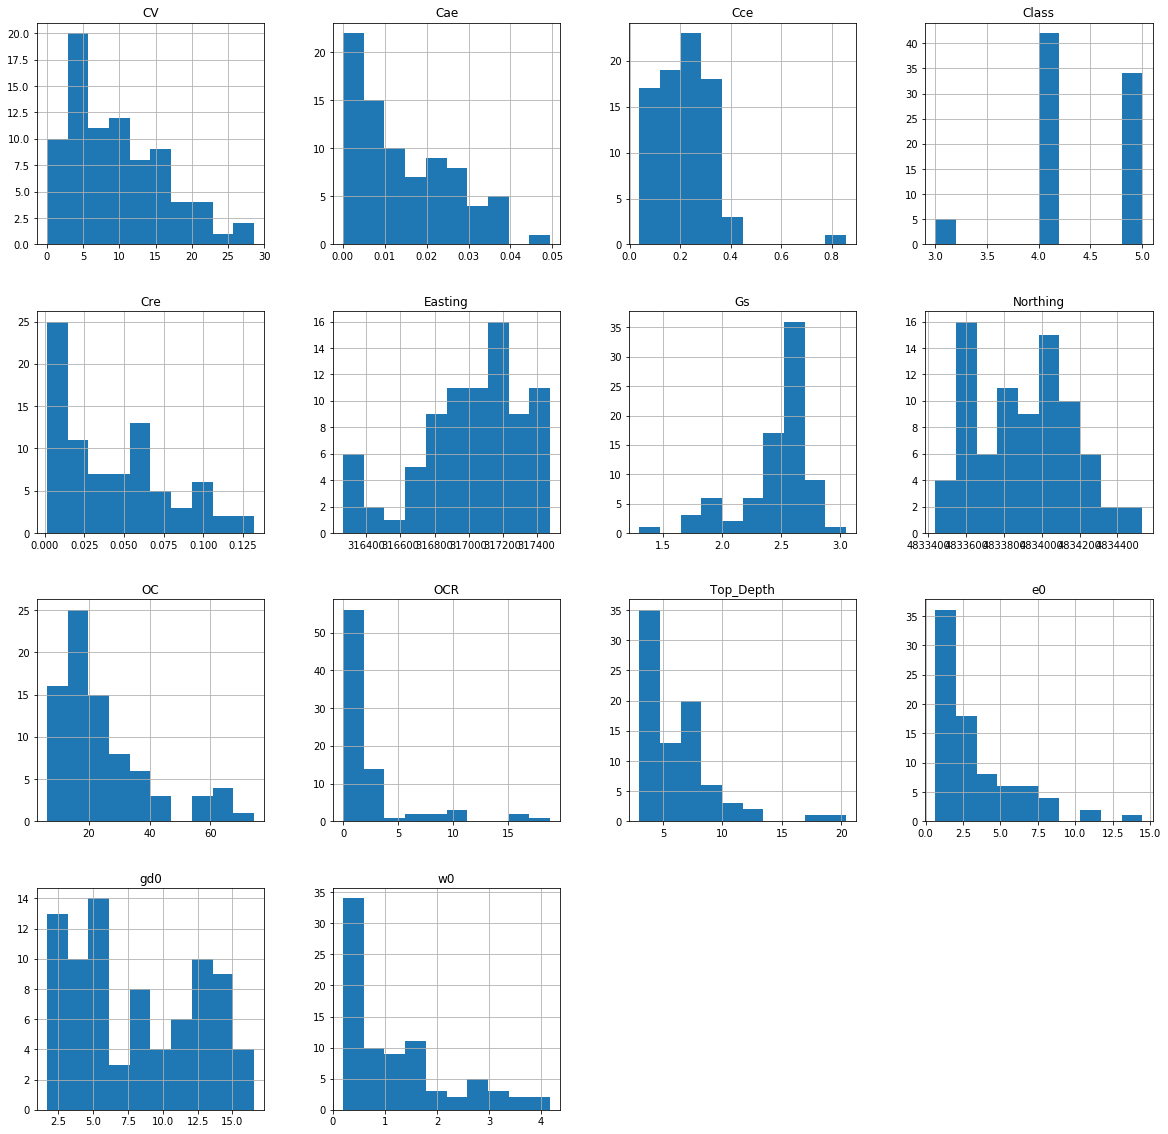

In [142]:
hist=Geo_DB.hist(figsize=(20,20))

<Figure size 1440x1440 with 0 Axes>

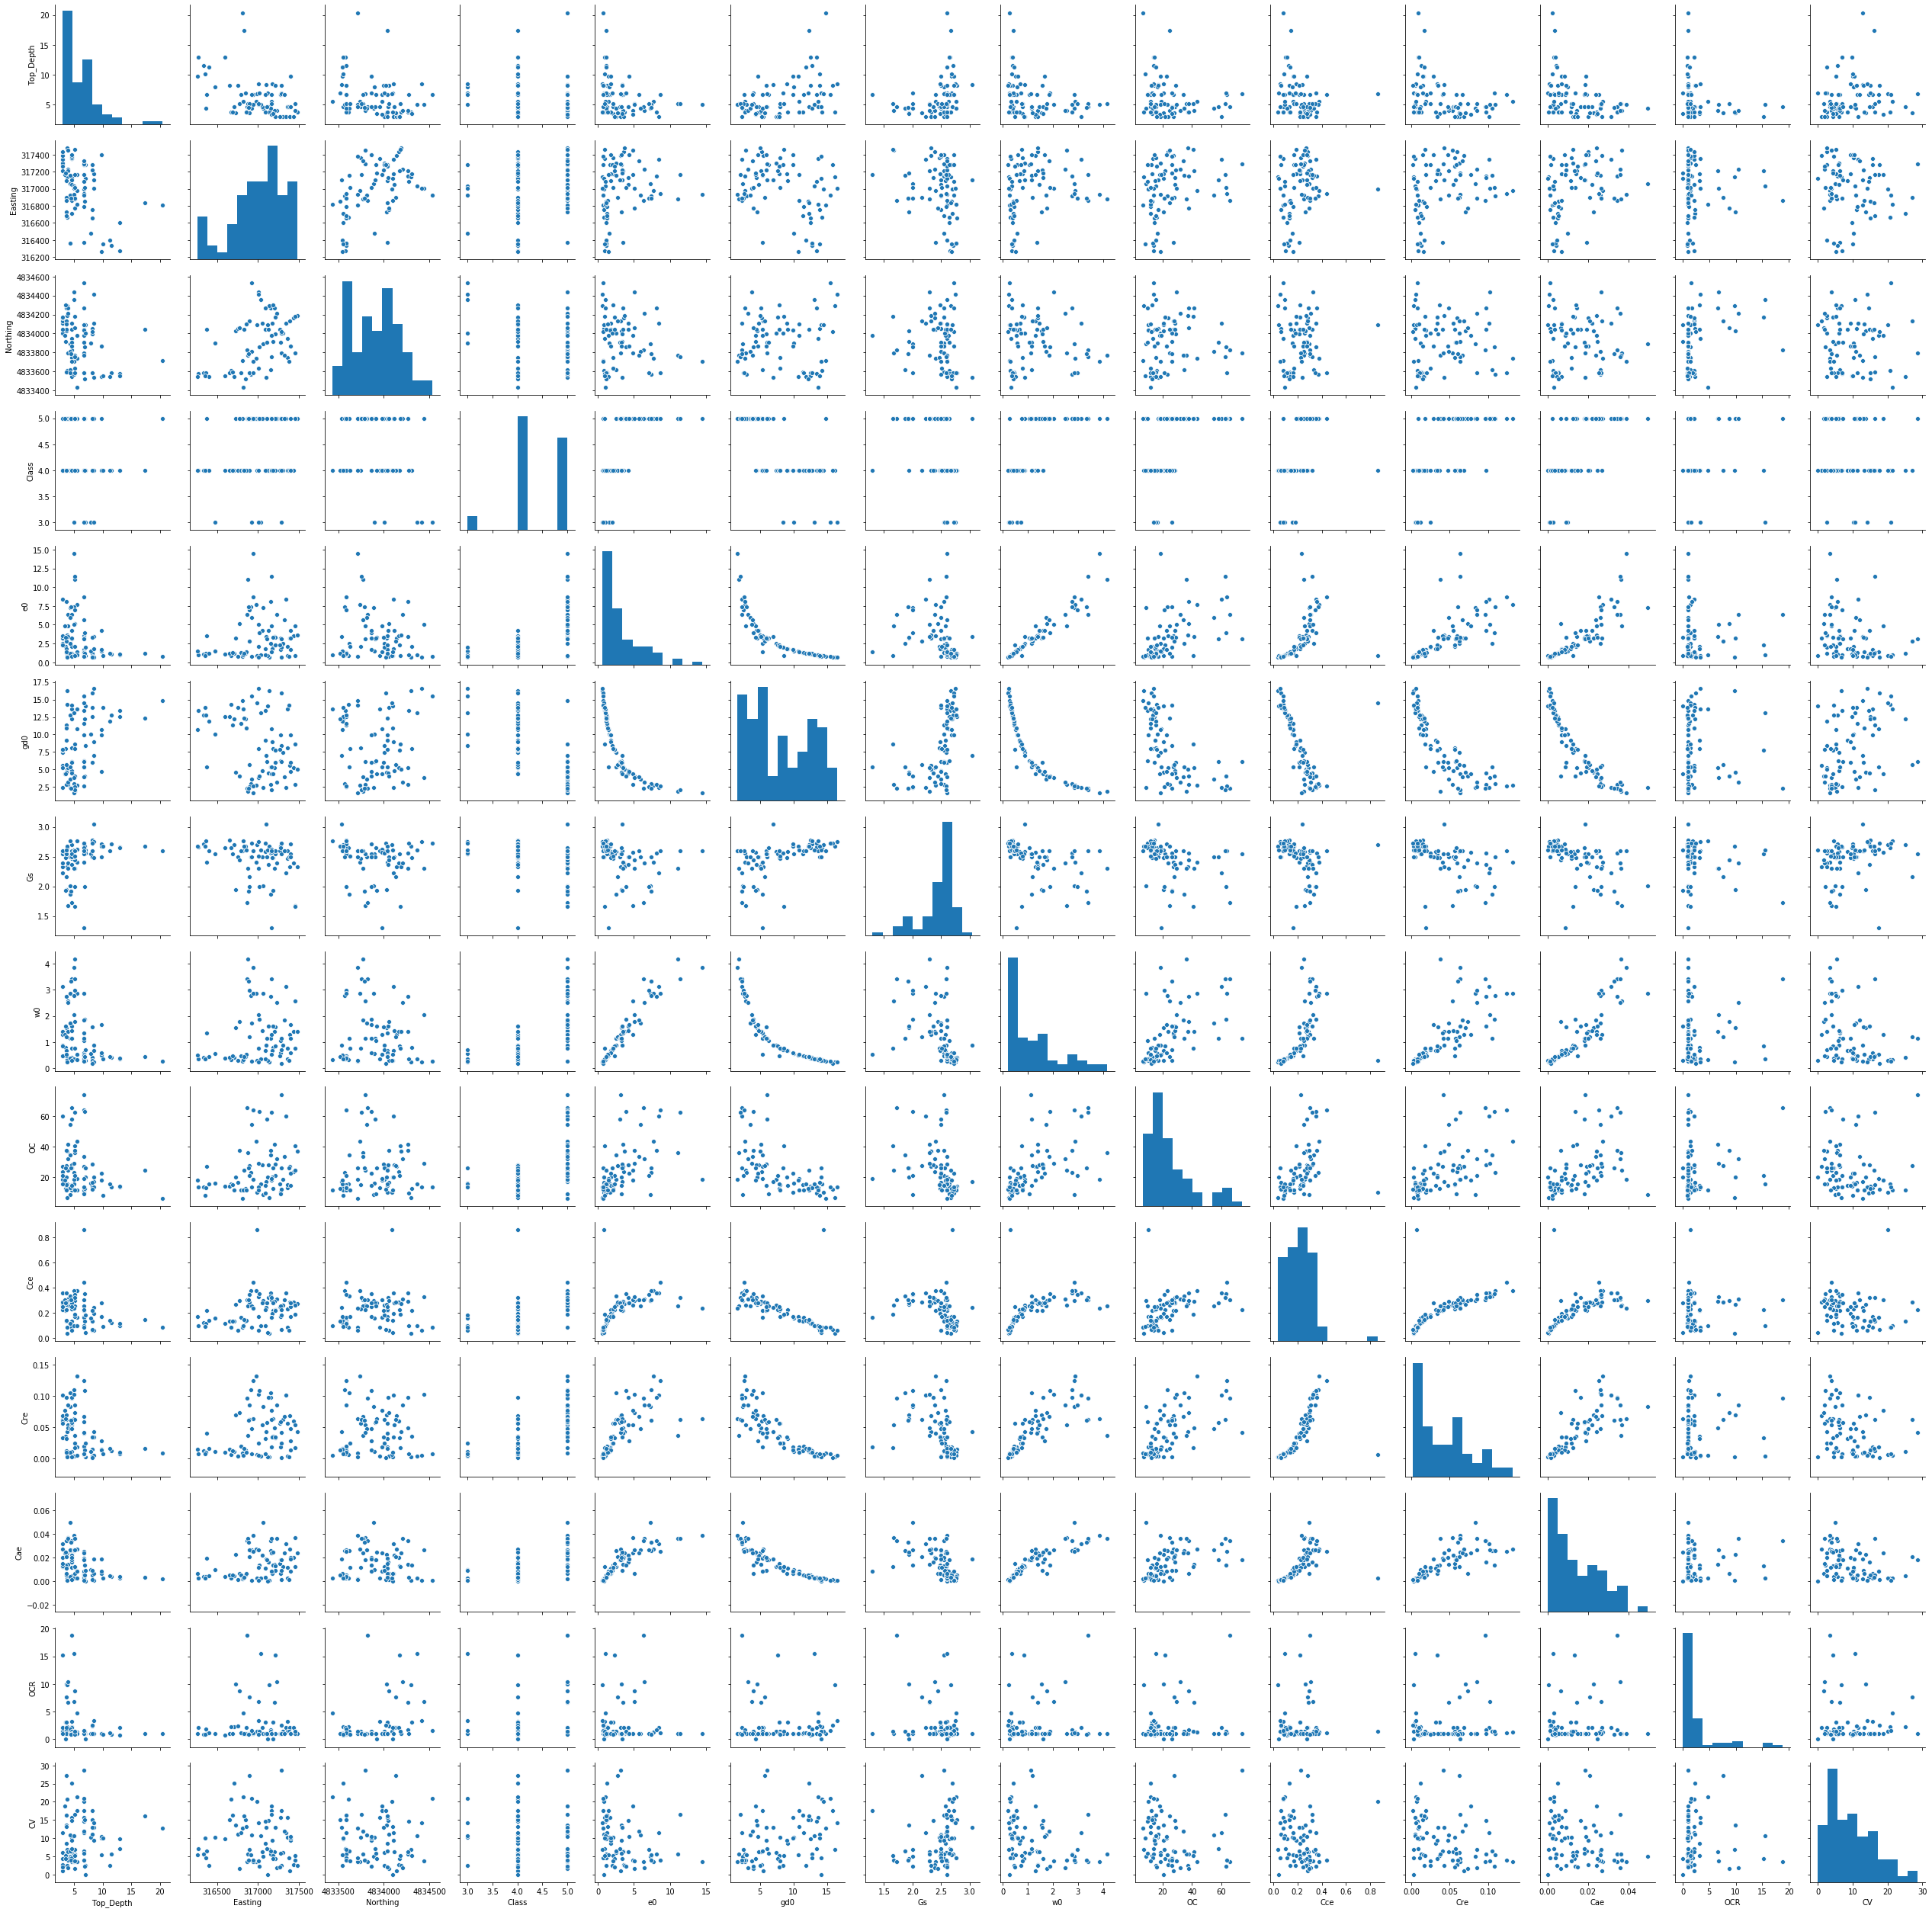

In [143]:
plt.figure(figsize=(20,20))
p=sns.pairplot(Geo_DB)
# The graph is not clear due to the number of subplots; Divide it into four pairplots

### The graph is not clear due to the number of subplots; Divide it into four pairplots

**First pair-plot : Top left corner**

C:\Users\User\Machine-Learning\Install\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\User\Machine-Learning\Install\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


<Figure size 1440x1440 with 0 Axes>

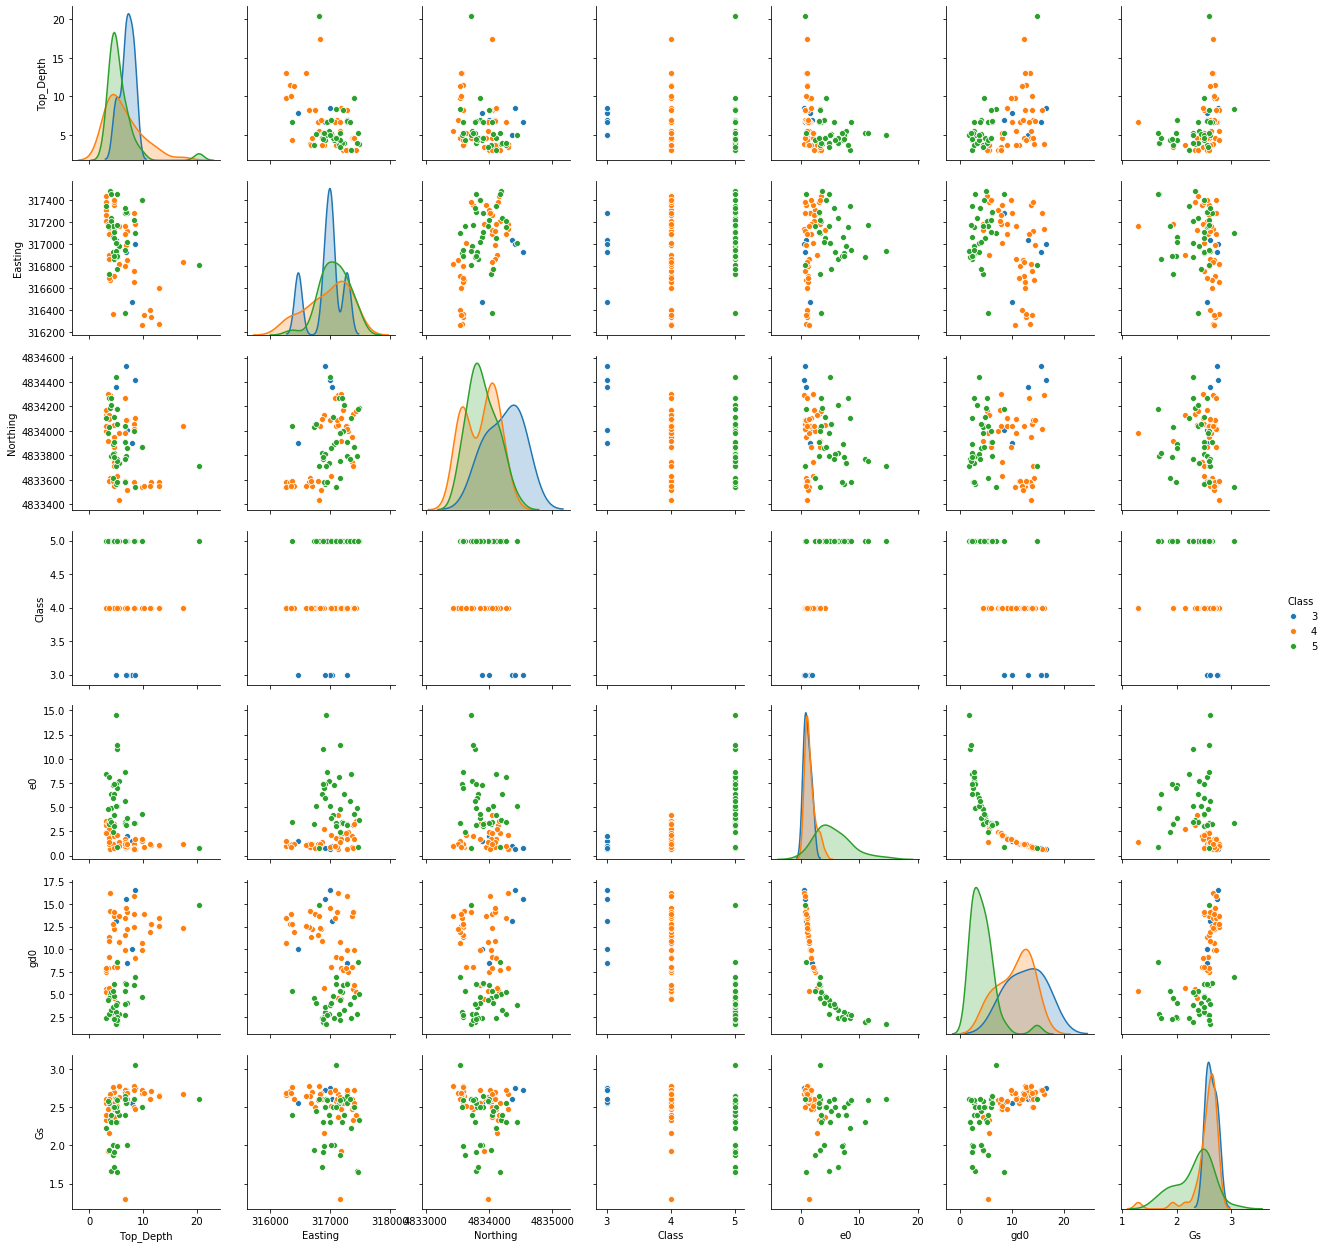

In [151]:
plt.figure(figsize=(20,20))
# top left corner of the original graph
p=sns.pairplot(Geo_DB,
               x_vars=['Top_Depth','Easting','Northing','Class','e0','gd0','Gs'],
               y_vars=['Top_Depth','Easting','Northing','Class','e0','gd0','Gs'],hue='Class')


**Second pair-plot : Top right corner**

<Figure size 1440x1440 with 0 Axes>

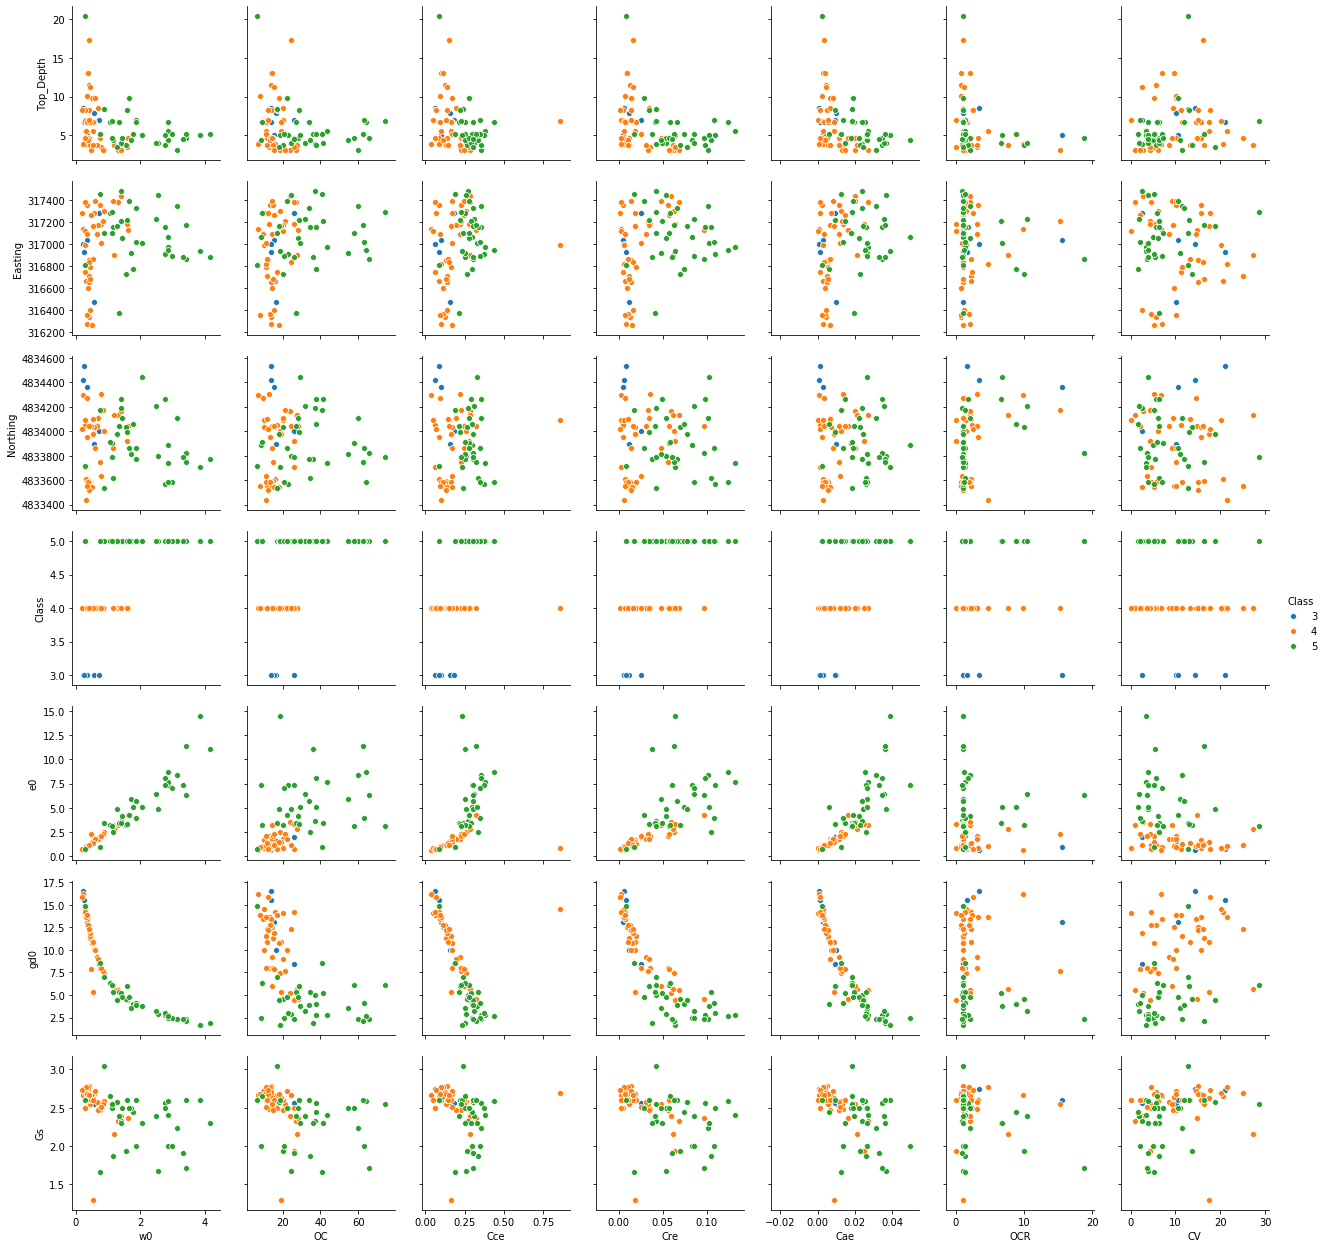

In [148]:
plt.figure(figsize=(20,20))
# top right corner of the original graph
p=sns.pairplot(Geo_DB,
               x_vars=['w0','OC','Cce','Cre','Cae','OCR','CV'],
               y_vars=['Top_Depth','Easting','Northing','Class','e0','gd0','Gs'],hue='Class')


**Third pair-plot : bottom left corner**

<Figure size 1440x1440 with 0 Axes>

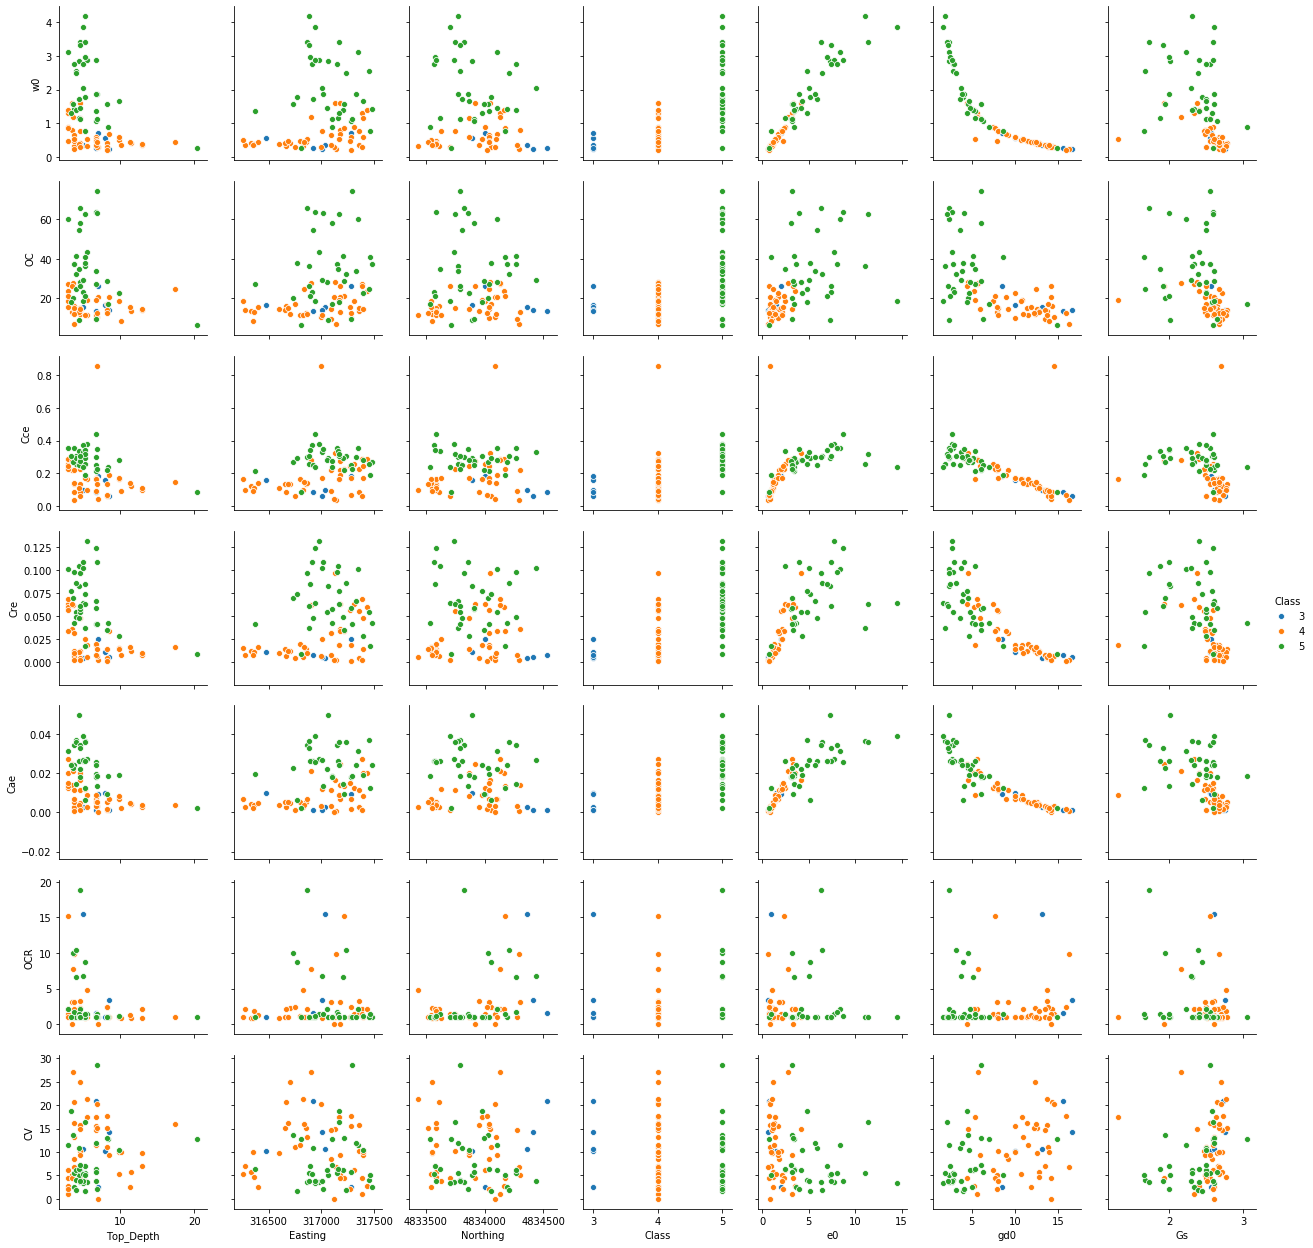

In [149]:
plt.figure(figsize=(20,20))
# bottom left corner of the original graph
p=sns.pairplot(Geo_DB,
               x_vars=['Top_Depth','Easting','Northing','Class','e0','gd0','Gs'],
               y_vars=['w0','OC','Cce','Cre','Cae','OCR','CV'],hue='Class')


**Fourth pair-plot : bottom right corner**

<Figure size 1440x1440 with 0 Axes>

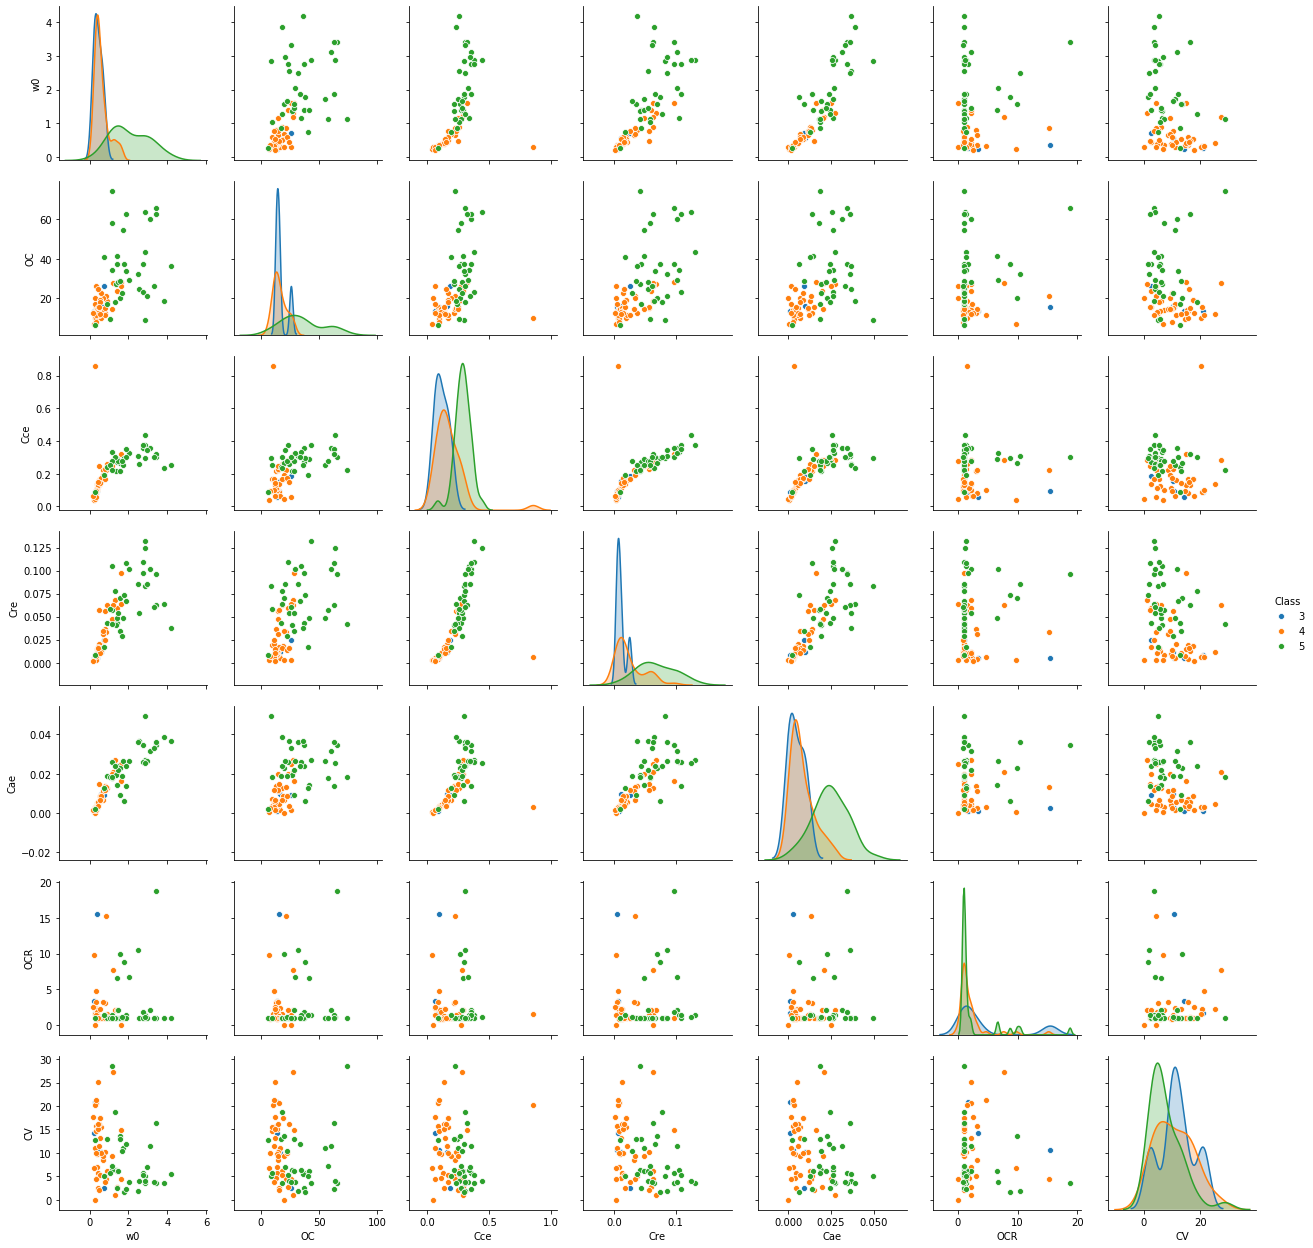

In [150]:
plt.figure(figsize=(20,20))
# bottom right corner of the original graph
p=sns.pairplot(Geo_DB,
               x_vars=['w0','OC','Cce','Cre','Cae','OCR','CV'],
               y_vars=['w0','OC','Cce','Cre','Cae','OCR','CV'],hue='Class')


### 2. Data Preparation

In [152]:
from sklearn.preprocessing import StandardScaler

In [153]:
# Scale all the features with standerd scaler
scaler=StandardScaler()
X=scaler.fit_transform(Geo_DB[features])
y=Geo_DB[targets]

In [154]:
print(X.shape,'-',y.shape)

(81, 9) - (81, 5)


In [160]:
#Split the data into Train, Validation, and Test
from sklearn.model_selection import train_test_split

X_train_full, X_test, y_train_full, y_test = train_test_split(X,y, test_size=0.2)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full,y_train_full, test_size=0.2)

print('Geo_DB Size:',Geo_DB.shape,'\n')
print('X Train Size:',X_train.shape,'\n'
      'X Validation Size:',X_valid.shape,'\n'
      'X Test Size',X_test.shape,'\n','\n'
      'y Train size:',y_train.shape,'\n'
      'y Validation Size:',y_valid.shape,'\n'
      'y Test Size:',y_test.shape)

Geo_DB Size: (81, 14) 

X Train Size: (51, 9) 
X Validation Size: (13, 9) 
X Test Size (17, 9) 
 
y Train size: (51, 5) 
y Validation Size: (13, 5) 
y Test Size: (17, 5)


In [161]:
y_valid

,Cce,Cre,Cae,OCR,CV
9,0.285906,0.059438,0.019921,2.149254,2.696442
12,0.239760,0.042674,0.018650,1.000000,12.879739
64,0.439404,0.124203,0.025500,1.171429,3.923386
4,0.083311,0.004376,0.002606,3.265306,15.677899
76,0.225559,0.041903,0.018500,1.000000,28.601241
35,0.334872,0.105054,0.026000,1.382979,6.366513
53,0.112808,0.010548,0.003872,1.872340,4.597301
5,0.260284,0.062719,0.012551,1.470588,6.097460
61,0.166824,0.015476,0.006709,1.000000,5.330813
44,0.165625,0.018491,0.008644,1.000000,17.497709


### 3. Regression Models

In [168]:
# importing various regression models
from sklearn.svm import SVR # support Vector Regressor
from sklearn.tree import DecisionTreeRegressor as dtr
from sklearn.neighbors import KNeighborsRegressor as knnr
from sklearn.ensemble import RandomForestRegressor as rfr

from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

In [212]:
# Defining regression models
Regressors = [knnr(),rfr(),dtr(),SVR(gamma='auto'),SVR(gamma='auto',kernel='linear')]
Regressors_names = ['K nearest neighbors',
                    'Random Forest',
                    'Decision Tree',
                    'SVM regressor (RBF)',
                    'SVM regressor (linear)']

#### 3.1 Modeling Cce


Validation Prediction:
    K nearest neighbors : 0.62
  Cross Validation:
    Cross Validation Scores: [ 0.11138202 -0.6462308  -0.19010113 -0.32158223  0.08974862]
     K nearest neighbors  mean accuracy:  -0.191 std: 0.079

Validation Prediction:
    Random Forest : 0.805
  Cross Validation:
    Cross Validation Scores: [ 0.81611804  0.54887244 -0.2797956   0.61188342  0.81818796]
     Random Forest  mean accuracy:  0.503 std: 0.165

Validation Prediction:
    Decision Tree : 0.569
  Cross Validation:
    Cross Validation Scores: [ 0.75798091  0.89990328 -0.28449271 -4.85243418  0.81281525]
     Decision Tree  mean accuracy:  -0.533 std: 4.85

Validation Prediction:
    SVM regressor (RBF) : 0.264
  Cross Validation:
    Cross Validation Scores: [ 0.62394538 -1.00440098 -0.13400477 -0.84936571  0.04867349]
     SVM regressor (RBF)  mean accuracy:  -0.263 std: 0.359

Validation Prediction:
    SVM regressor (linear) : -0.276
  Cross Validation:
    Cross Validation Scores: [ 0.184653

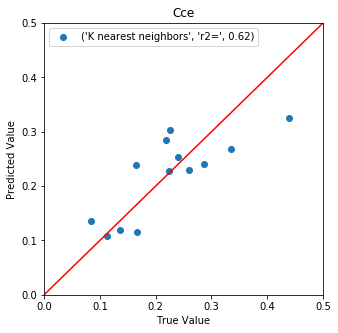

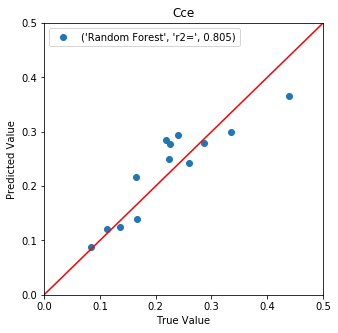

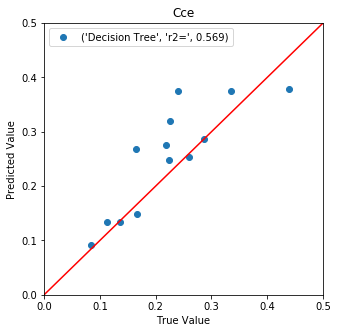

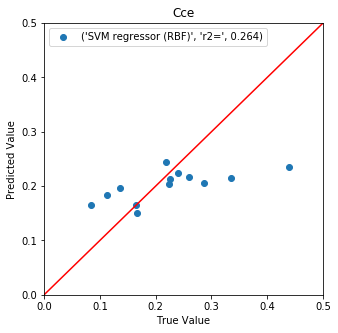

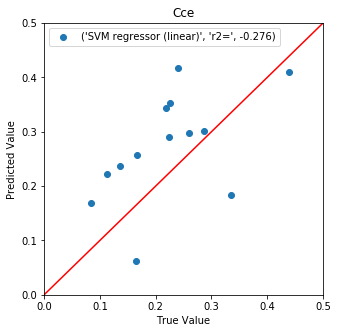

In [240]:
#targets=['Cce','Cre','Cae','OCR','CV']

for reg, reg_name in zip(Regressors, Regressors_names):
    #Train the model
    reg.fit(X_train, y_train['Cce'])
    
    #Predict the validation data set
    y_valid_predict = reg.predict(X_valid)
    
    print('\nValidation Prediction:')
    R2=round(r2_score(y_valid['Cce'],y_valid_predict),3)
    print("   ",reg_name,':',R2)

    # Cross Validation
    print('  Cross Validation:')
    cv_scores = cross_val_score(reg, X_train, y_train['Cce'],scoring='r2', cv=5)
    
    print('    Cross Validation Scores:',cv_scores)
    print("    ",reg_name, ' mean accuracy: ', round(cv_scores.mean(), 3), 'std:', round(cv_scores.var(), 3))
    

    plt.figure(figsize=(5,5))
    plt.scatter(np.array(y_valid['Cce']),y_valid_predict,label=(reg_name,'r2=',R2))
    
    plt.xlim(0,0.5)
    plt.xlabel('True Value')
    
    plt.ylim(0,0.5)
    plt.ylabel('Predicted Value')
    
    plt.plot([0,0.5],[0,0.5], color='red')
    
    plt.legend()
    plt.title('Cce')


In [224]:
reg=rfr()
reg.fit(X_train, y_train)
y_valid_predict = reg.predict(X_valid)  


C:\Users\User\Machine-Learning\Install\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [227]:
list(zip(features, reg.feature_importances_))

[('Top_Depth', 0.073998873271094),
 ('Easting', 0.1046339475295236),
 ('Northing', 0.13221476140595304),
 ('Class', 0.008341697537360054),
 ('e0', 0.05425311810563617),
 ('gd0', 0.022394011089036443),
 ('Gs', 0.427531032838991),
 ('w0', 0.014852819930971418),
 ('OC', 0.16177973829143427)]

#### 3.2 Modeling Cre


Validation Prediction:
    K nearest neighbors : 0.587
  Cross Validation:
    Cross Validation Scores: [0.07354432 0.83597678 0.906015   0.85386958 0.38811562]
     K nearest neighbors  mean accuracy:  0.612 std: 0.107

Validation Prediction:
    Random Forest : 0.762
  Cross Validation:
    Cross Validation Scores: [0.53259466 0.7343149  0.88012251 0.83772497 0.47743717]
     Random Forest  mean accuracy:  0.692 std: 0.026

Validation Prediction:
    Decision Tree : 0.561
  Cross Validation:
    Cross Validation Scores: [-0.30362126  0.55944098  0.77834032  0.83905049  0.54339405]
     Decision Tree  mean accuracy:  0.483 std: 0.168

Validation Prediction:
    SVM regressor (RBF) : -0.433
  Cross Validation:
    Cross Validation Scores: [-1.62478204 -0.94385388 -0.75231792 -0.38258001 -0.04310593]
     SVM regressor (RBF)  mean accuracy:  -0.749 std: 0.288

Validation Prediction:
    SVM regressor (linear) : -0.433
  Cross Validation:
    Cross Validation Scores: [-1.62478204 -0.943

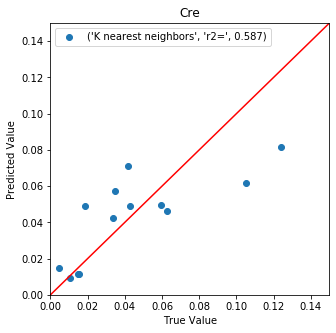

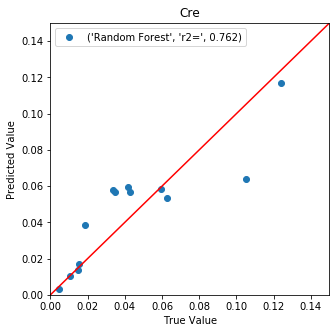

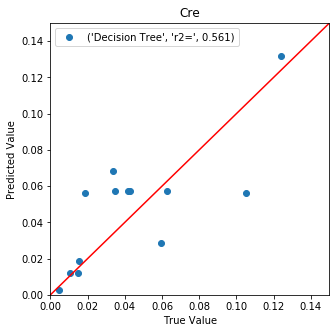

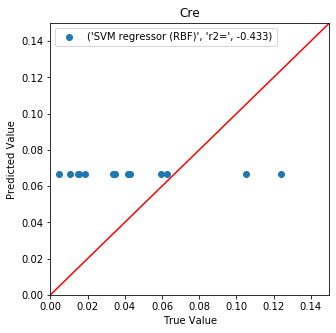

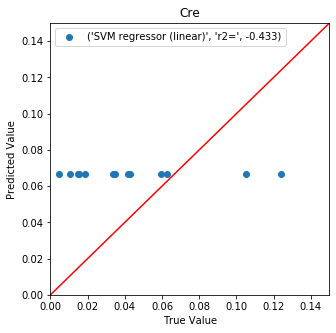

In [236]:
#targets=['Cce','Cre','Cae','OCR','CV']

for reg, reg_name in zip(Regressors, Regressors_names):
    #Train the model
    reg.fit(X_train, y_train['Cre'])
    
    #Predict the validation data set
    y_valid_predict = reg.predict(X_valid)
    
    print('\nValidation Prediction:')
    R2=round(r2_score(y_valid['Cre'],y_valid_predict),3)
    print("   ",reg_name,':',R2)

    # Cross Validation
    print('  Cross Validation:')
    cv_scores = cross_val_score(reg, X_train, y_train['Cre'],scoring='r2', cv=5)
    
    print('    Cross Validation Scores:',cv_scores)
    print("    ",reg_name, ' mean accuracy: ', round(cv_scores.mean(), 3), 'std:', round(cv_scores.var(), 3))
    

    plt.figure(figsize=(5,5))
    plt.scatter(np.array(y_valid['Cre']),y_valid_predict,label=(reg_name,'r2=',R2))
    
    plt.xlim(0,0.15)
    plt.xlabel('True Value')
    
    plt.ylim(0,0.15)
    plt.ylabel('Predicted Value')
    
    plt.plot([0,0.15],[0,0.15], color='red')
    
    plt.legend()
    plt.title('Cre')
    


#### 3.3 Modeling Cae


Validation Prediction:
    K nearest neighbors : 0.461
  Cross Validation:
    Cross Validation Scores: [0.72357139 0.79819465 0.94218823 0.72600049 0.58638264]
     K nearest neighbors  mean accuracy:  0.755 std: 0.013

Validation Prediction:
    Random Forest : 0.721
  Cross Validation:
    Cross Validation Scores: [0.8595793  0.95718507 0.98097595 0.63679405 0.59415838]
     Random Forest  mean accuracy:  0.806 std: 0.026

Validation Prediction:
    Decision Tree : 0.556
  Cross Validation:
    Cross Validation Scores: [0.82411269 0.47028942 0.97759814 0.4893122  0.50415199]
     Decision Tree  mean accuracy:  0.653 std: 0.043

Validation Prediction:
    SVM regressor (RBF) : -2.412
  Cross Validation:
    Cross Validation Scores: [-0.04463205 -1.41874809 -0.84858631 -0.8729395  -0.21948124]
     SVM regressor (RBF)  mean accuracy:  -0.681 std: 0.245

Validation Prediction:
    SVM regressor (linear) : -2.412
  Cross Validation:
    Cross Validation Scores: [-0.04463205 -1.41874809

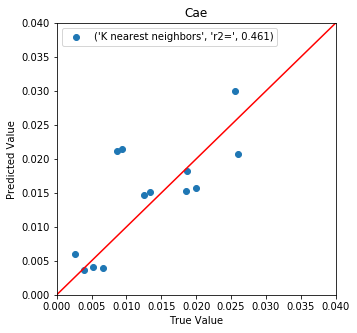

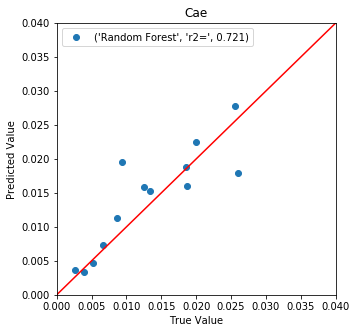

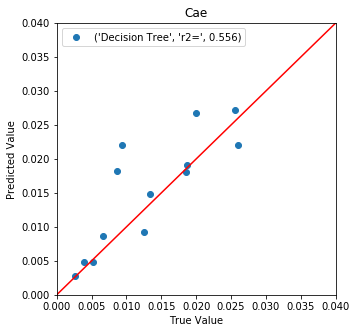

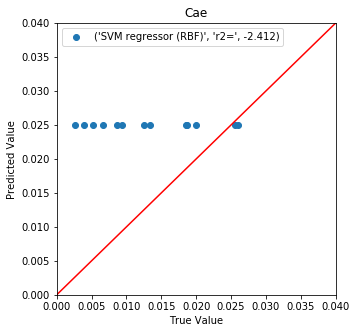

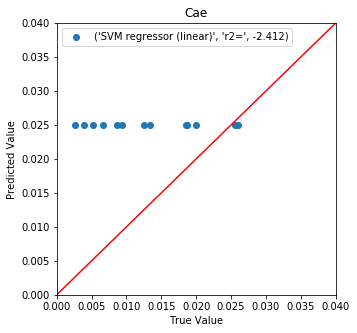

In [235]:
#targets=['Cce','Cre','Cae','OCR','CV']

for reg, reg_name in zip(Regressors, Regressors_names):
    #Train the model
    reg.fit(X_train, y_train['Cae'])
    
    #Predict the validation data set
    y_valid_predict = reg.predict(X_valid)
    
    print('\nValidation Prediction:')
    R2=round(r2_score(y_valid['Cae'],y_valid_predict),3)
    print("   ",reg_name,':',R2)

    # Cross Validation
    print('  Cross Validation:')
    cv_scores = cross_val_score(reg, X_train, y_train['Cae'],scoring='r2', cv=5)
    
    print('    Cross Validation Scores:',cv_scores)
    print("    ",reg_name, ' mean accuracy: ', round(cv_scores.mean(), 3), 'std:', round(cv_scores.var(), 3))
    

    plt.figure(figsize=(5,5))
    plt.scatter(np.array(y_valid['Cae']),y_valid_predict,label=(reg_name,'r2=',R2))
    
    plt.xlim(0,0.04)
    plt.xlabel('True Value')
    
    plt.ylim(0,0.04)
    plt.ylabel('Predicted Value')
    
    plt.plot([0,0.04],[0,0.04], color='red')
    
    plt.legend()
    plt.title('Cae')


#### 3.4 Modeling OCR


Validation Prediction:
    K nearest neighbors : -0.056
  Cross Validation:
    Cross Validation Scores: [-135.04638408  -25.46452097   -0.35683583   -0.28992598   -0.41642523]
     K nearest neighbors  mean accuracy:  -32.315 std: 2733.023

Validation Prediction:
    Random Forest : -0.604
  Cross Validation:
    Cross Validation Scores: [-2.75079603e+02 -1.76608033e+01 -1.45080701e-01 -3.65312542e-01
 -1.04352703e+00]
     Random Forest  mean accuracy:  -58.859 std: 11732.021

Validation Prediction:
    Decision Tree : -1.742
  Cross Validation:
    Cross Validation Scores: [-3.36172332e+02 -2.95070904e+01 -2.13305920e-01 -3.01850459e-01
 -5.98575789e+00]
     Decision Tree  mean accuracy:  -74.436 std: 17242.966

Validation Prediction:
    SVM regressor (RBF) : 0.03
  Cross Validation:
    Cross Validation Scores: [-10.72767685  -0.90294001  -0.1799898   -0.53881322  -0.21081951]
     SVM regressor (RBF)  mean accuracy:  -2.512 std: 16.943

Validation Prediction:
    SVM regressor 

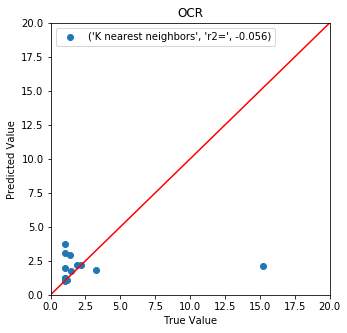

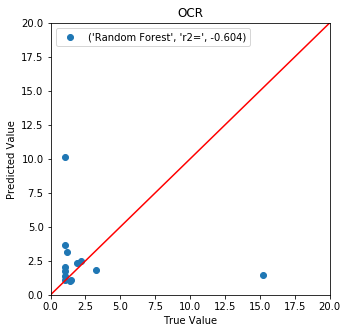

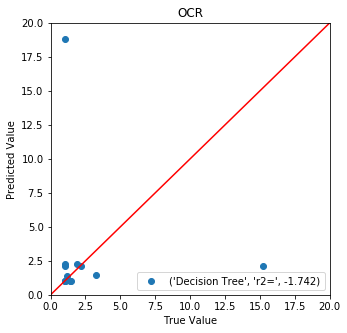

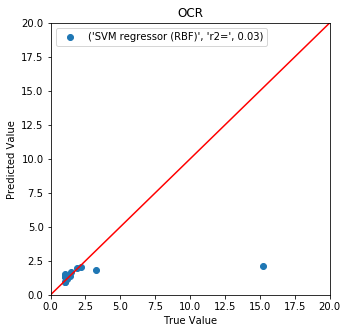

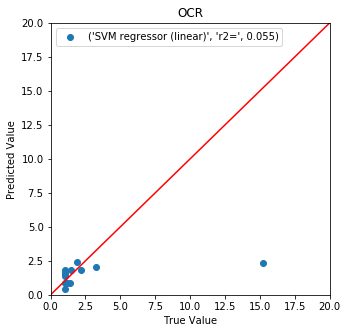

In [241]:
#targets=['Cce','Cre','Cae','OCR','CV']

for reg, reg_name in zip(Regressors, Regressors_names):
    #Train the model
    reg.fit(X_train, y_train['OCR'])
    
    #Predict the validation data set
    y_valid_predict = reg.predict(X_valid)
    
    print('\nValidation Prediction:')
    R2=round(r2_score(y_valid['OCR'],y_valid_predict),3)
    print("   ",reg_name,':',R2)

    # Cross Validation
    print('  Cross Validation:')
    cv_scores = cross_val_score(reg, X_train, y_train['OCR'],scoring='r2', cv=5)
    
    print('    Cross Validation Scores:',cv_scores)
    print("    ",reg_name, ' mean accuracy: ', round(cv_scores.mean(), 3), 'std:', round(cv_scores.var(), 3))
    

    plt.figure(figsize=(5,5))
    plt.scatter(np.array(y_valid['OCR']),y_valid_predict,label=(reg_name,'r2=',R2))
    
    plt.xlim(0,20)
    plt.xlabel('True Value')
    
    plt.ylim(0,20)
    plt.ylabel('Predicted Value')
    
    plt.plot([0,20],[0,20], color='red')
    
    plt.legend()
    plt.title('OCR')
    


#### 3.5 Modeling CV


Validation Prediction:
    K nearest neighbors : -0.32
  Cross Validation:
    Cross Validation Scores: [0.16098535 0.08925492 0.32733628 0.01330816 0.10870713]
     K nearest neighbors  mean accuracy:  0.14 std: 0.011

Validation Prediction:
    Random Forest : -0.698
  Cross Validation:
    Cross Validation Scores: [-0.01759286  0.0819812   0.68294614  0.43326953  0.46777404]
     Random Forest  mean accuracy:  0.33 std: 0.067

Validation Prediction:
    Decision Tree : -1.263
  Cross Validation:
    Cross Validation Scores: [-0.73325731  0.33077432  0.20246799 -0.54207549  0.0098369 ]
     Decision Tree  mean accuracy:  -0.146 std: 0.175

Validation Prediction:
    SVM regressor (RBF) : -0.068
  Cross Validation:
    Cross Validation Scores: [0.24087949 0.01047908 0.23139124 0.13004399 0.34452979]
     SVM regressor (RBF)  mean accuracy:  0.191 std: 0.013

Validation Prediction:
    SVM regressor (linear) : -0.321
  Cross Validation:
    Cross Validation Scores: [-0.42925163 -0.202

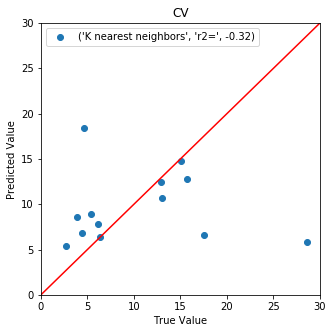

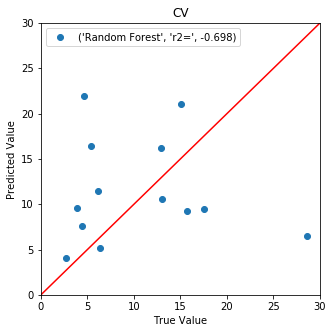

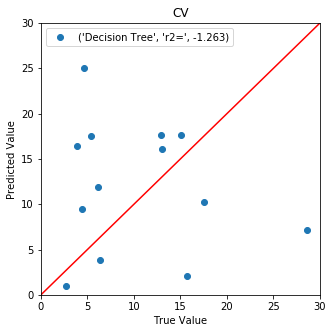

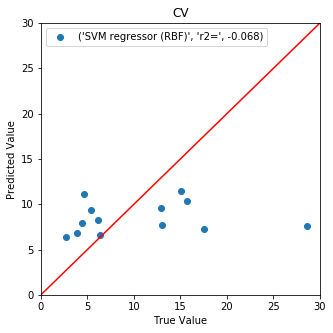

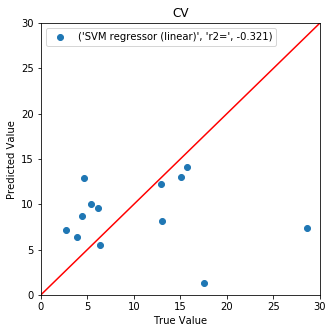

In [243]:
#targets=['Cce','Cre','Cae','OCR','CV']

for reg, reg_name in zip(Regressors, Regressors_names):
    #Train the model
    reg.fit(X_train, y_train['CV'])
    
    #Predict the validation data set
    y_valid_predict = reg.predict(X_valid)
    
    print('\nValidation Prediction:')
    R2=round(r2_score(y_valid['CV'],y_valid_predict),3)
    print("   ",reg_name,':',R2)

    # Cross Validation
    print('  Cross Validation:')
    cv_scores = cross_val_score(reg, X_train, y_train['CV'],scoring='r2', cv=5)
    
    print('    Cross Validation Scores:',cv_scores)
    print("    ",reg_name, ' mean accuracy: ', round(cv_scores.mean(), 3), 'std:', round(cv_scores.var(), 3))
    

    plt.figure(figsize=(5,5))
    plt.scatter(np.array(y_valid['CV']),y_valid_predict,label=(reg_name,'r2=',R2))
    
    plt.xlim(0,30)
    plt.xlabel('True Value')
    
    plt.ylim(0,30)
    plt.ylabel('Predicted Value')
    
    plt.plot([0,30],[0,30], color='red')
    
    plt.legend()
    plt.title('CV')
    
